# Recherche des zéros d'une fonction

In [1]:
# Numbering the equations

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from matplotlib.ticker import NullFormatter  # useful for `logit` scale
# Set common figure parameters:
newparams = {'figure.figsize': (10, 8),
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

In [4]:
# Two times
# Set common figure parameters:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
newparams = {'figure.figsize': (10, 8),
             'lines.linewidth': 1.5, 'lines.markersize': 10,
             'font.size': 14}
plt.rcParams.update(newparams)

In [5]:
# Définition des fonctions

In [6]:
def dichotomie0 (f,a,b,epsilon): 
# Méthode de dichotomie avec un critère de convergence sur f(x)
    
    if (f(a)*f(b) >= 0):
        print("Pas de 0 dans l'intervalle [",a,";",b,"]")
        return float('NaN')  # None
    else:
        x1 = a
        x2 = b
        x = 0.5*(x1+x2)
        while abs(f(x))>epsilon:
            if f(x1)*f(x) < 0:
                x2 = x
            else:
                x1 = x
            x = 0.5*(x1+x2)    
    return x

def dichotomie (f,a,b,epsilon,cmax): 
# Méthode de dichotomie améliorée avec la prise en compte d'un compteur 
# et un critère de convergence sur x
    
    if f(a)*f(b) >= 0:
        print("Pas de 0 dans l'intervalle [",a,";",b,"]")
        return float('NaN')  # None #
    else:
        compteur = 0

        x1 = a
        x2 = b
        x = 0.5*(x1+x2)
        while x2-x1>epsilon:
            compteur=compteur+1
            if compteur > cmax:
                print("Limite du compteur atteinte")
                break
            if f(x1)*f(x) < 0:
                x2 = x
            else:
                x1 = x
            x = 0.5*(x1+x2)    
        #print(f"Résultat obtenu en {compteur:3d} itérations (cmax={cmax:3d}).")
    return x, compteur



def newton_raphson0(f,fprime,x,eps):
    y = f(x)     
    while ( abs(y) > eps ):
        x = x - y/fprime(x);
        y = f(x)
    return x;


def newton_raphson(f,fprime,x,eps,cmax):
# Newton_Raphson amélioré avec la prise en compte du compteur.
    compteur = 0
    y = f(x)    
    while ( abs(y) > eps and compteur < cmax):
        compteur=compteur+1
        x = x - y/fprime(x);
        y = f(x)
    return x, compteur;

#if cmax < 100:
#    print("la solution est xxx et le nombre d'itération vaut xxx")
#else:
#    print("Limite du compteur atteinte")


def newton_raphson2(f,x,eps,cmax):
# Newton_Raphson amélioré avec la prise en compte du compteur.
    compteur = 0
    y, dy = f(x)     
    while ( abs(y) > eps and compteur < cmax):
        compteur=compteur+1
        x = x - y/dy;
        y, dy = f(x)
    return x, compteur;

## Introduction 

Ce chapitre aborde le problème de trouver les solutions d'une équation numériquement. Ces problèmes apparaissent souvent en physique dans les problèmes d'optimisation ou bien de calcul d'équilibre physique et dans certains algorithmes numériques telle que la méthode numérique implicite pour la résolution d'une équation différentielle ordinaire. À une dimension, le problème peut toujours se mettre sous la forme suivante :
\begin{equation}
f(x) = 0 
\end{equation}
où $f$ est une fonction et $x$ est la (ou les) valeur(s) que l'on recherche. Ce sont les racines ou zéro de la fonction $f$. Il existe plusieurs méthodes numériques pour résoudre ce problème et ce chapitre traitera de deux méthodes classiques : la méthode de dichotomie et la méthode de Newton-Raphson. 

Ce problème se généralise à N-dimensions avec $n$ fonctions de $n$ variables sous la forme suivante :
\begin{eqnarray}
f_0(x_0, x_1, ..., x_n) =  0 \nonumber \\
f_1(x_0, x_1, ..., x_n) =  0 \nonumber  \\
...  = 0 \\
f_n(x_0, x_1, ..., x_n) =  0 \nonumber  \\
\end{eqnarray}
ou sous forme vectorielle
\begin{equation}
\mathbf f(\mathbf x) = \mathbf 0. 
\end{equation}
Cependant, le problème devient alors bien plus compliqué à résoudre qu'à une seule dimension car il n'est plus possible d'encadrer la solution de manière efficace comme pour la méthode de dichotomie. Cependant, la méthode de Newton-Raphson se généralise facilement à N-dimensions.  





## La méthode de dichotomie (à la maison)

### Présentation de la méthode  

La méthode de dichotomie consiste à choisir un intervalle qui contient une unique solution, puis à encadrer cette solution en divisant l'intervalle en deux parties égales (d'où le nom de la méthode) et en sélectionnant l'intervalle contenant la solution. Ces étapes sont répétées jusqu'à atteindre la solution suivant un critère de convergence. L'avantage de cette méthode est que l'algorithme converge toujours vers la solution, à condition qu'il n'y ait qu'une seule et unique solution dans l'intervalle de départ. 

Cette méthode repose sur le principe que la fonction change de signe au passage par la racine. Ainsi, pour un intervalle $[a,b]$ contenant la racine, le produit $f(a)f(b)$ est négatif. On divise l'intervalle en deux parties égales en posant $c = \frac{a+b}{2}$. Si le produit  $f(a)f(c)$ est négatif alors la racine est dans l'intervalle $[a,c]$, sinon la racine est dans l'intervalle $[c,b]$. Puis, on itére le processus jusqu'à un seuil de précision défini préalablement. Cette précision peut être soit sur la valeur de $x$, la racine, et les itérations stoppent lorsque la longueur de l'intervalle est inférieure à la précision $\epsilon$: $(b-a) < \epsilon $. Soit sur la proximité de $|f(x)|$ du zéro et le critère est de la forme $|f(x)| < \epsilon$.  

L'algorithme pourra s'écrire ainsi :  
- soit un intervalle initial $[a,b]$ contenant une unique racine de la fonction $f$. 
- On divise l'intervalle en deux $c = \frac{a+b}{2}$.  
- On calcule $f(a)f(c)$ et on détermine son signe. Si il est négatif alors l'intervalle suivant est $[a,c]$ sinon se sera $[c,b]$. 
- On itère le processus et le critère de sortie est défini par $(b-a) < \epsilon $ ou $|f(x)| < \epsilon$. 


Pour s'assurer que l'intervalle initial contient une seule et unique solution, on peut par exemple tracer la courbe. Il faut alors se méfier de la représentation graphique et notamment de la discrétisation utilisée pour tracer la courbe, surtout si celle-ci présente un fort gradient.   

La figure ci-dessous illustre la méthode :

!["figure dichotomie"](dichotomie.png)

*Fig. 1: Méthode de dichotomie*

### Exercices

On prendra comme critère de convergence une précision de $\epsilon = 10^{-8}$ sur la détermination de la racine. 

**1)** Ecrire une fonction *dichotomie* qui contient l'algorithme de dichotomie et dont les paramètres d'entrés sont une fonction, a, b, les bornes de l'intervalle et eps pour $\epsilon$. La fonction retourne la valeur de la racine. 

**2)** Nous allons nous assurer que l'algorithme est écrit correctement en résolvant des équations dont on connait les solutions. Vous pouvez tester par exemple : 
$$ f(x) = \cos{x} $$
$$ f(x) = x^2 - 4 $$

**3)** Introduire un compteur dans la fonction *dichotomie*.  

**4)** Maintenant, nous pouvons résoudre l’équation suivante 
$$ \cos{x} = x \;\;\; \textrm{soit} \;\;\;  f (x) = x − \cos{x} =0 $$ 

Tracer la fonction f sur l’intervalle `[0; 3]` et sur une feuille papier, dessinez quelques unes des étapes successives de l’algorithme de la dichotomie. 

Donner le résultat et le nombre d'itération pour la fonction $f$ avec une précision de $10^{-8}$. 

In [7]:
# Fonctions tests
def f1(x):
    f1 = np.cos(x)
    return f1

def f2(x):
    f2 = x**2 - 4
    return f2

def f3(x):
    f3 = x - np.cos(x)
    return f3


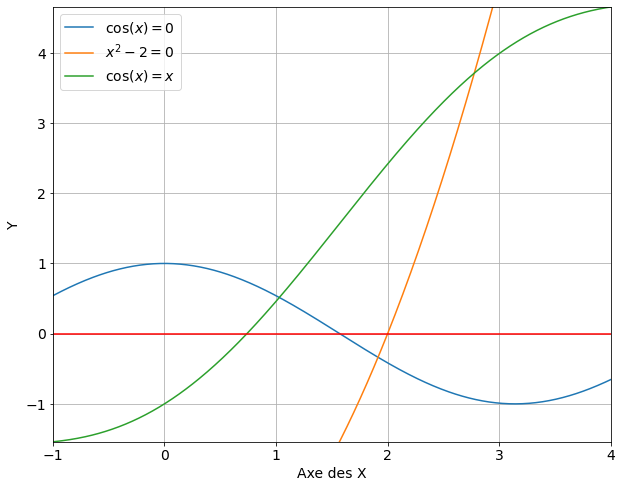

In [8]:
#from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
#rc('text', usetex=True)

x =  np.linspace(-1,4, num=500)
y1 = f1(x)
y2 = f2(x)
y3 = f3(x)

plt.xlabel("Axe des X")
plt.ylabel("Y")
plt.plot(x,y1,label=r'$\cos{(x)}=0$')
plt.plot(x,y2,label=r'$x^2-2=0$')
plt.plot(x,y3,label=r'$\cos{(x)}=x$')

plt.plot(x,0*y1,'-r')
plt.grid(True)
plt.xlim(min(x), max(x))
plt.ylim(min(y3), max(y3))
plt.legend()
plt.show()

In [9]:
# Fonctions tests
eps = 1.e-8
cmax=100

# test sans solution car mauvais choix d'intervalle
a = 0.1 ; b = 0.4
x0=dichotomie0(f1,a,b,eps)
print(f"La racine avec la méthode de dichotomie est {x0:22.15e} ")

a = 0; b = 2
x0, compteur =dichotomie(f1,a,b,eps,cmax)
print(f"La racine obtenue en {compteur:3d} itérations par " + \
      f"la méthode de dichotomie est {x0:12.8e} ")  # si on veut un résultat à 10-8 comment imprimer? 


a=0 ; b=3.6
x0, compteur =dichotomie(f2,a,b,eps,cmax)
print(f"La racine obtenue en {compteur:3d} itérations par " + \
      f"la méthode de dichotomie est {x0:12.8e} ")  

a=0 ; b=3
x0, compteur =dichotomie(f3,0,3,eps,cmax)
print(f"La racine obtenue en {compteur:3d} itérations par " + \
      f"la méthode de dichotomie est {x0:12.8e} ")  

Pas de 0 dans l'intervalle [ 0.1 ; 0.4 ]
La racine avec la méthode de dichotomie est                    nan 
La racine obtenue en  28 itérations par la méthode de dichotomie est 1.57079633e+00 
La racine obtenue en  29 itérations par la méthode de dichotomie est 2.00000000e+00 
La racine obtenue en  29 itérations par la méthode de dichotomie est 7.39085133e-01 


## La méthode de Newton-Raphson

### Présentation de la méthode 

La méthode de Newton-Raphson est une méthode classique à une dimension qui se généralise très bien à N-dimensions. D'un point de vue géométrique, cette méthode consiste à prolonger la tangente de la fonction $f$ à un point $x_i$ et à chercher son interesection avec l'axe des ordonnées en zéro. Ce point d'intersection est alors pris comme nouveau point de départ de la recherche $x_{i+1}$ et ainsi de suite jusqu'à ce que la fonction se rapproche suffisament du zéro. D'un point de vue algébrique, cette méthode repose sur le développement de Taylor. La fonction est approximée autour de $x_0$ au premier ordre par 
\begin{equation}
f(x) = f(x_0) + f'(x_0)(x-x_0)
\end{equation}
et donc $ f(x) =0$ implique que 
\begin{equation}
x = x_0 - \frac{f(x_0)}{f'(x_0)} 
\end{equation}
comme la fonction n'est a priori pas linéaire, il faut alors itérer le processus :
\begin{equation}
 x_{i+1} = x_i - \frac{f(x_i)}{f'(x_i)}. 
\end{equation}
Comme précédemment, la condition d'arrêt porte soit sur la solution $x$ soit sur la fonction $f(x)$. Cependant, contrairement au cas de la méthode de dichotomie, cette méthode recquiert le calcul de la dérivée de la fonction $f'(x)$ et d'une seule condition de départ le $x_0$.

Cette méthode bien qu'elle soit très efficace car sa convergence est plus rapide que la méthode de dichotomie, recèle de nombreux pièges qu'il faut connaître et reconnaître :
- le cas où la dérivée est très petite ou bien s'annulle. Le point itéré sera alors projeté loin du point de départ et l'approximation linéaire ne sera plus valide,  
- l'existence de plusieurs zéros. Dans ce cas, cette méthode ne permet pas de choisir le zéro désiré à moins de contraindre la solution sur un intervalle pré-défini,
- un cas où la fonction présente une courbure bien particulière et qui implique que l'algorithme se retrouve dans un cycle et donc ne converge pas. 

Pour éviter ces différents problèmes, il est conseillé de 
- stopper l'algorithme lorsque celui-ci diverge, le plus simple est d'imposer un nombre maximum d'itération.
- préparer le problème par une analyse graphique et en calculant le comportement de la fonction aux asymptotes,
- parfois il est judicieux de reformuler le problème pour éliminer une racine. 

Si la dérivée analytique n'est pas calculable, on peut toujours la calculer numériquement par la méthode des différences finies. Cependant, dans ce cas la méthode converge beaucoup moins rapidement. 

La figure ci-dessous illustre la méthode :

!["figure dichotomie"](newton.png)

*Fig. 2: Méthode de Newton-Raphson*

### Exercices

On prendra comme critère de convergence une précision de $10^{-8}$ sur la détermination de la racine $(x^*)$. 


**1)** Tester la méthode de Newton-Raphson avec la fonction $f (x) = \sin{x}$ et le point de départ $x_0 = 0.1$.
Faites de même avec $x_0 = 1.55$, que constatez-vous et expliquez. 

**2)** Maintenant, on compare la vitesse de convergence entre la méthode de dichotomie et la méthode de Newton-Raphson pour la fonction :
$$ f(x) = \sin{x} $$

avec $x0=0.1$. 

Enfin, on testera sur la méthode de Newton-Raphson, $$ f(x) = \sin{x} $$ avec $x0=1.55$
et enfin :
$$ f(x) = \frac{1}{2} - \tanh{(x-1)} $$

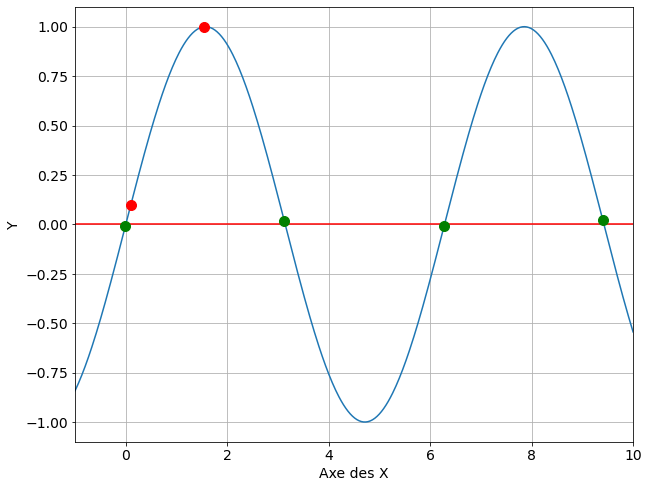

In [10]:
# Fonction test f(x)=sin(x)
def sinf(x):
    y = np.sin(x)
    return y

def cosf(x):
    y = np.cos(x)
    return y

x =  np.linspace(-1,10, num=500)
y = sinf(x)

plt.xlabel("Axe des X")
plt.ylabel("Y")
plt.plot(x,y)
plt.plot(x,0*y,'-r')
plt.grid(True)
plt.xlim(min(x), max(x))
plt.ylim(min(y)-0.1, max(y)+0.1)

plt.plot(0.1,sinf(0.1),'or')
plt.plot(1.55,sinf(1.55),'or')

idx = np.argwhere(np.diff(np.sign(y - 0))).flatten()
plt.plot(x[idx], y[idx], 'og')


plt.show()

In [11]:
eps = 1e-4

a = -0.1
b =  0.1 
x0, compteur_d = dichotomie(sinf,a,b,eps,cmax)
x1, compteur_n = newton_raphson(sinf,cosf,b,eps,cmax)
print(f"La racine avec la méthode de dichotomie est {x0:22.15e} et {x1:22.15e} avec la méthode de Newton ")
print(f"Compteur pour la méthode de dichotomie : {compteur_d:d}")
print(f"Itération pour la méthode de newton    : {compteur_n:d}")
print("")

a=-0.1
b=1.55
x0,compteur_d=dichotomie(sinf,a,b,eps,cmax)
x1,compteur_n=newton_raphson(sinf,cosf,b,eps,cmax)
print(f"La racine avec la méthode de dichotomie est {x0:22.15e} et {x1:22.15e}" \
      +f" avec la méthode de Newton. La racine {x1:22.15e} est un multiple de pi. Le rapport vaut {int(x1/np.pi):d}")

La racine avec la méthode de dichotomie est  9.995117187500001e-02 et  1.249502806993999e-11 avec la méthode de Newton 
Compteur pour la méthode de dichotomie : 11
Itération pour la méthode de newton    : 2

La racine avec la méthode de dichotomie est -2.212524414062942e-05 et -4.712388980384899e+01 avec la méthode de Newton. La racine -4.712388980384899e+01 est un multiple de pi. Le rapport vaut -15


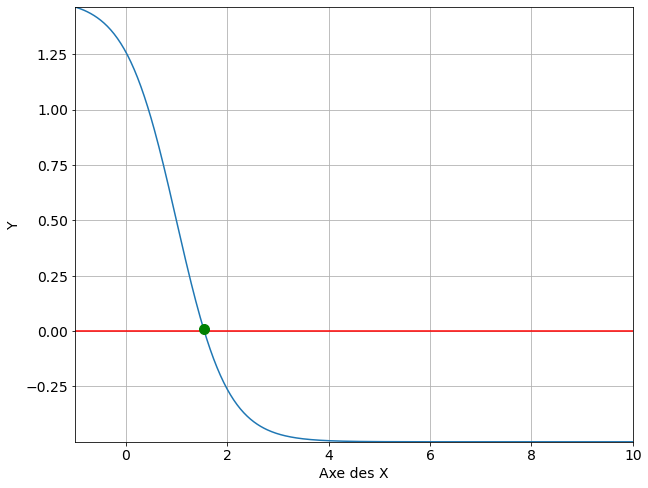

In [12]:
# Fonction test f(x)=sin(x)
def tanhf(x):
    y = 0.5 - np.tanh(x-1)
    return y

def dtanhf(x):
    y = -1./np.cosh(x-1)**2
    return y


x =  np.linspace(-1,10, num=500)
y = tanhf(x)

plt.xlabel("Axe des X")
plt.ylabel("Y")
plt.plot(x,y)
plt.plot(x,0*y,'-r')
plt.grid(True)
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))

idx = np.argwhere(np.diff(np.sign(y - 0))).flatten()
plt.plot(x[idx], y[idx], 'og')

plt.show()

In [13]:
a=0 ; b=2
x0,compteur=dichotomie(tanhf,a,b,eps,cmax)
x1,compteur=newton_raphson(tanhf,dtanhf,b,eps,cmax)
print(f"La racine avec la méthode de dichotomie est {x0:22.15e} et {x1:22.15e}  avec la méthode de Newton ")

b = 3
x1,compteur=newton_raphson(tanhf,dtanhf,b,eps,cmax)
print(f"La racine avec la méthode de dichotomie est {x0:22.15e} et {x1:22.15e}  avec la méthode de Newton ")

La racine avec la méthode de dichotomie est  1.549285888671875e+00 et  1.549240493270466e+00  avec la méthode de Newton 
La racine avec la méthode de dichotomie est  1.549285888671875e+00 et                    nan  avec la méthode de Newton 


/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in cosh
  import sys
/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: divide by zero encountered in double_scalars
/home/travis/virtualenv/python3.6.7/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in double_scalars


## Références

Depondt, Physique Numérique

Press et al, Numerical Recipes